In [1]:
import blackhc.notebook

%load_ext autoreload
%autoreload 2


In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [12]:
%matplotlib inline

In [21]:
# create input data
def input_data(n=100, p=0.5):
    mix_a = np.random.multivariate_normal([1,1], np.diag([1,1]), size=n)
    mix_b = np.random.multivariate_normal([5,5], np.diag([0.5,1]), size=n)
    mix_coeff = np.random.binomial(n=1, p=p, size=[n,1])
    return (mix_a*mix_coeff + mix_b*(1-mix_coeff)), mix_coeff

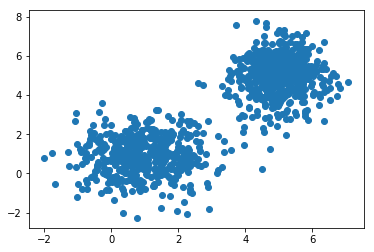

In [34]:
data_y, data_x = input_data(1000)
plt.scatter(x=data_y[:,0], y=data_y[:,1])

In [24]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

C:\Program Files\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [35]:
# baseline model
def create_baseline():
	# create model
	model = Sequential()
	model.add(Dense(60, input_dim=2, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [36]:
# evaluate model with standardized dataset
estimator = KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, data_y, data_x, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Results: 99.70% (0.46%)


In [37]:
estimator.get_params()

{'batch_size': 5,
 'build_fn': <function __main__.create_baseline>,
 'epochs': 100,
 'verbose': 0}

In [38]:
estimator.sk_params

{'batch_size': 5, 'epochs': 100, 'verbose': 0}

AttributeError: 'KerasClassifier' object has no attribute 'model'